# Import & Read file

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
import itertools
import math
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as mpl
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


In [47]:
df = pd.read_csv('Movies_Rates.csv', encoding='ISO-8859-1')

df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [48]:
#Chech Nulls
df.isna().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [49]:
#Check Types
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [50]:
#Duplicates
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(df.duplicated().sum())


#####################################
if (df.duplicated().sum()>0):
    df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped")
else:
    print("No duplicate rows")
df.duplicated().sum()

Duplicate rows found:
6
Duplicate rows dropped


0

In [51]:
#Names
df=df.drop(columns = 'Name')

In [52]:
#Year
df['Year'] = df['Year'].astype(str)
df['Year'].replace('nan', np.nan, inplace=True)
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
df['Year'] = df['Year'].str.extract('(\d+)')
df['Year'] = pd.to_numeric(df['Year'])
df['Year'] = datetime.datetime.now().year - df['Year']

print(df['Year'])



0         5
1         5
2         3
3         5
4        14
         ..
15504    36
15505    25
15506    19
15507    36
15508    26
Name: Year, Length: 15503, dtype: int64


In [53]:
#Duration
df['Duration'].replace('nan', np.nan, inplace=True)
df['Duration'] = df['Duration'].fillna(df['Duration'].mode()[0])
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'] = df['Duration'] /60
df['Duration'] = df['Duration'].astype(int)
print(df['Duration'])


0        2
1        1
2        1
3        1
4        1
        ..
15504    2
15505    2
15506    2
15507    2
15508    2
Name: Duration, Length: 15503, dtype: int64


In [54]:
#Genre
df['Genre'].replace('nan', np.nan, inplace=True)
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])


In [55]:
#Rating
df.dropna(subset=['Rating'], inplace=True)
df['Rating']

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
...,...
15501,5.3
15503,5.8
15504,4.6
15505,4.5


In [56]:
# votes
df['Votes'] = df['Votes'].str.replace(',', '')
rows_to_drop = df[df['Votes'] == '$5.16M'].index
df = df.drop(rows_to_drop)
df['Votes'] =np.log(df['Votes'].astype(int))


In [57]:
print(f"Types:\n{df.dtypes}")

print(f"Nulls:\n{df.isna().sum()}")

Types:
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object
Nulls:
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64


In [58]:
 #Director
df['Director'] = df['Director'].fillna(df['Director'].mode().iloc[0])

In [59]:
#actors
df['Actor 1'] = df['Actor 1'].fillna(df['Actor 1'].mode().iloc[0])
df['Actor 2'] = df['Actor 2'].fillna(df['Actor 2'].mode().iloc[0])
df['Actor 3'] = df['Actor 3'].fillna(df['Actor 3'].mode().iloc[0])

# feature engineering

In [60]:
# year
df['Arg-year'] = df.groupby('Year')['Rating'].transform('mean')

# duration
df['Duration'] = df.groupby('Duration')['Rating'].transform('mean')

# genre
df['Genre'] = df.groupby('Genre')['Rating'].transform('mean')

# votes
df['Votes'] = df.groupby('Votes')['Rating'].transform('mean')

# director
df['director_avg_rating']  = df.groupby('Director')['Rating'].transform('mean')

# actors
df['Actor1_avg_rating'] = df.groupby('Actor 1')['Rating'].transform('mean')

df['Actor2_avg_rating'] = df.groupby('Actor 2')['Rating'].transform('mean')

df['Actor3_avg_rating'] = df.groupby('Actor 3')['Rating'].transform('mean')

# actor with director
df['actors']= (df['Actor1_avg_rating'] + df['Actor2_avg_rating'] + df['Actor3_avg_rating'] ) /3

# actor1 with director
df['actor1_with_director']= (df['Actor1_avg_rating'] + df['director_avg_rating'] )/2



# Encoding

In [61]:
Y = pd.DataFrame(df['Rating'])
#X = df.drop('Rating',axis=1)
X=df[['Genre', 'Votes','director_avg_rating','actors','Arg-year']]

In [62]:
# Standardizing only the numerical columns
columns_to_scale = ['Genre', 'Votes', 'director_avg_rating', 'actors', 'Arg-year']
X.loc[:, columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X.isna().sum()

,0
Genre,0
Votes,0
director_avg_rating,0
actors,0
Arg-year,0


# outlairs

In [63]:
# #Outliers
numerical_columns = ['Votes','director_avg_rating','actors','Arg-year']
threshold = 3
z_scores = (X[numerical_columns] - X[numerical_columns].mean()) / X[numerical_columns].std()
outliers = (np.abs(z_scores) > threshold)
outliers_mask = outliers.any(axis=1)
X_cleaned = X[~outliers_mask]
X_cleaned.reset_index(drop=True, inplace=True)


# feature selection

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train

,Genre,Votes,director_avg_rating,actors,Arg-year
8157,0.143565,-0.249865,2.109098,3.040587,0.953888
8455,0.817127,-0.045527,-0.608380,0.237171,0.824972
14490,0.522460,-2.674138,0.266529,-0.817710,0.407352
2697,-1.269062,-0.145101,-1.454218,-0.874328,-1.339811
15470,3.741472,0.560525,1.880680,1.384655,-0.536502
...,...,...,...,...,...
10137,1.200147,2.303144,1.606579,0.781903,0.190020
10449,0.116720,1.163608,0.732735,0.758864,1.168225
1527,-1.269062,0.517664,-0.649045,0.054800,0.259124
14938,1.318742,-0.578441,1.012693,0.675262,-1.263391


In [65]:
#####To see all relations
# Correlation matrix
merged_train = pd.concat([X, Y], axis=1)
correlation_values = merged_train.corr()['Rating'].sort_values(ascending=False)
print(correlation_values)
corr = merged_train.corr()



Rating                 1.000000
actors                 0.830333
director_avg_rating    0.792136
Votes                  0.552562
Genre                  0.427189
Arg-year               0.361197
Name: Rating, dtype: float64


# EDA

### Residual plot

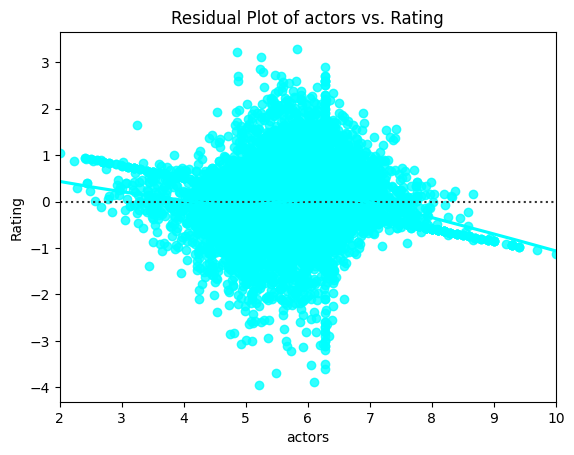

In [66]:
sns.residplot(x='actors', y='Rating', data=df, lowess=True, color='aqua')
plt.title('Residual Plot of actors vs. Rating')
plt.show()

### 3D Scatter Plot

In [67]:

# 3D scatter plot
fig = px.scatter_3d(df, x='Votes', y='actors', z='Rating', color='Rating', title='3D Scatter Plot of Votes , Rating, and Rating')
fig.show()

### plot

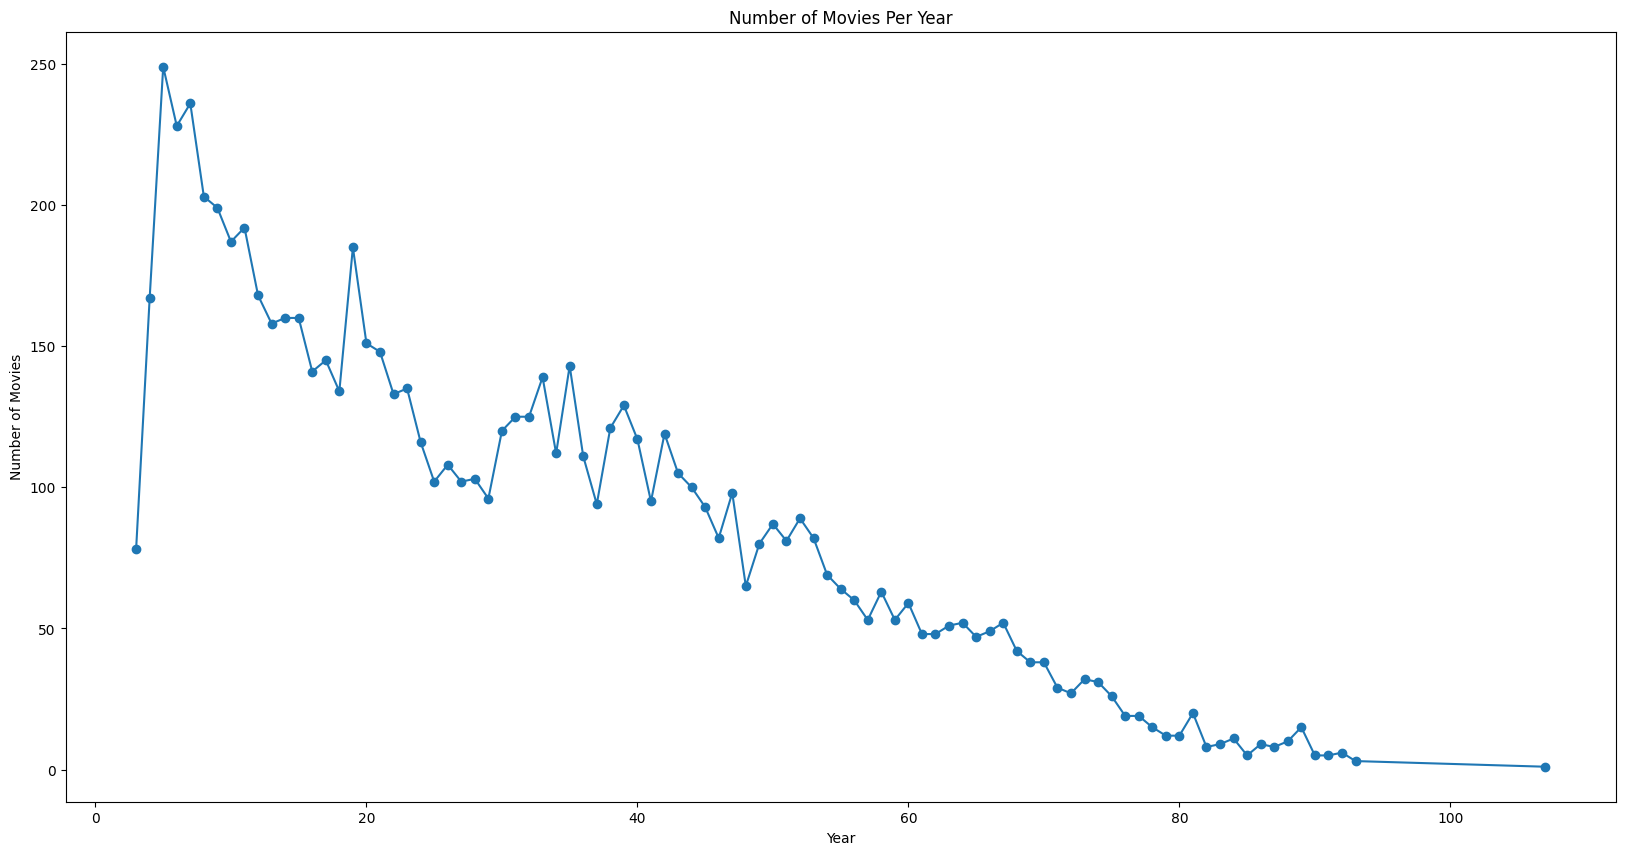

In [68]:
plt.figure(figsize=(20, 10))

year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.show()

### pie plot

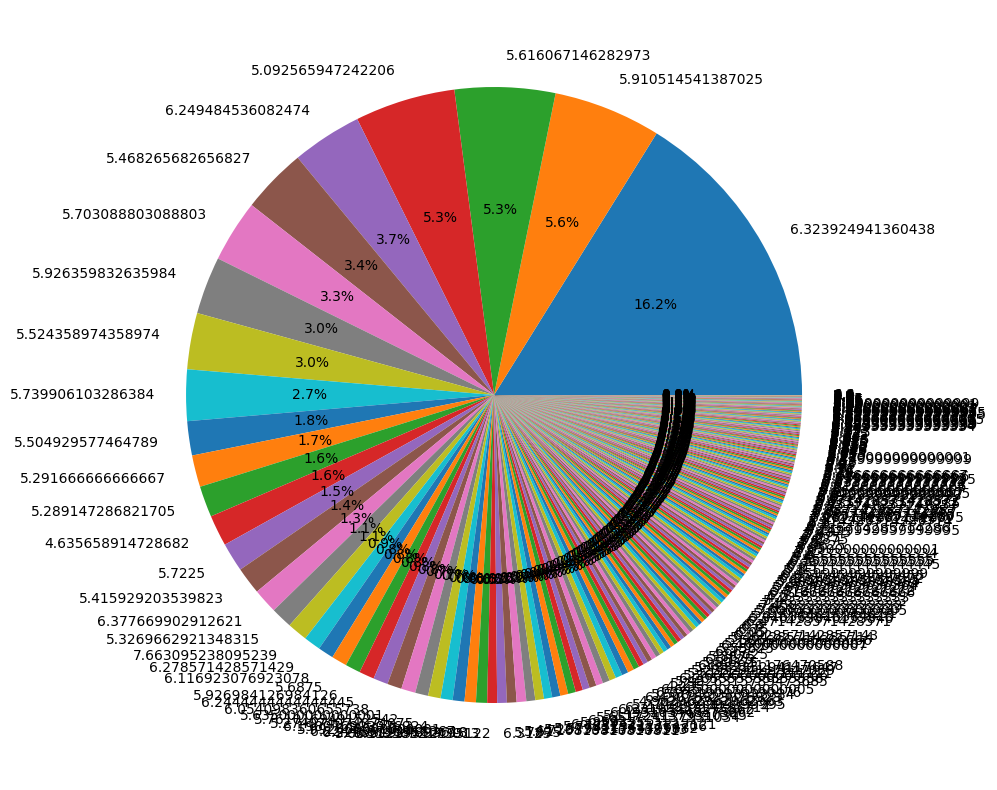

In [69]:
label = df["Genre"].value_counts().index
sizes = df["Genre"].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels= label, startangle = 0 , shadow = False , autopct='%1.1f%%')
plt.show()

### scatter plot

In [70]:

px.scatter(df,x='Rating',y='Votes',color='Rating',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Rating Versus Votes')

### bar plot

<ipython-input-71-90186e7150ad>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-90186e7150ad>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



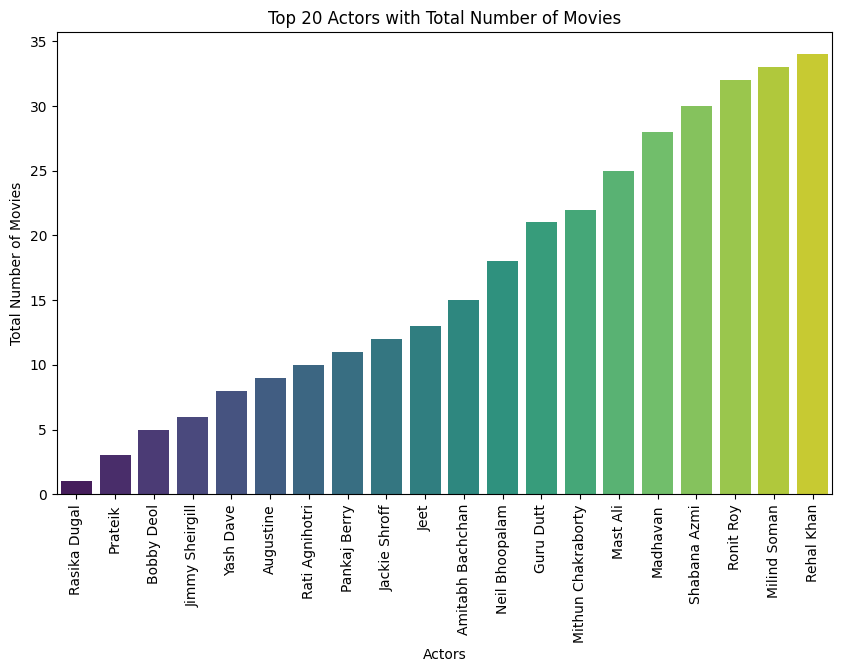

In [71]:

mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=df['Actor 1'].head(20).values, y=df['Actor 1'].head(20).index, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()

<ipython-input-72-b11172fafdcd>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-72-b11172fafdcd>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



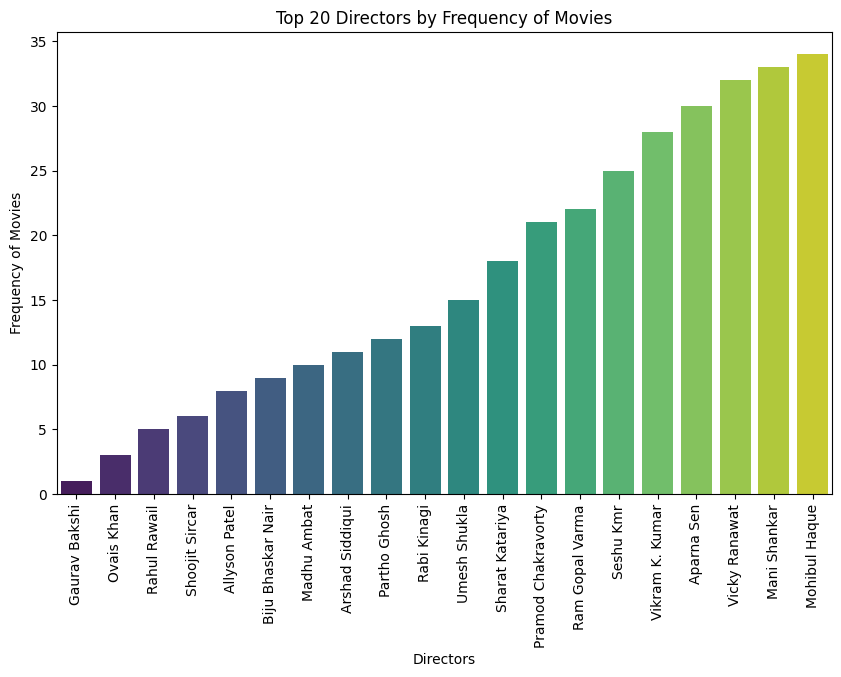

In [72]:
import seaborn as sb
import matplotlib.pyplot as mpl
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=df['Director'].head(20).values, y=df['Director'].head(20).index, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()

### Pair plot for multiple variables

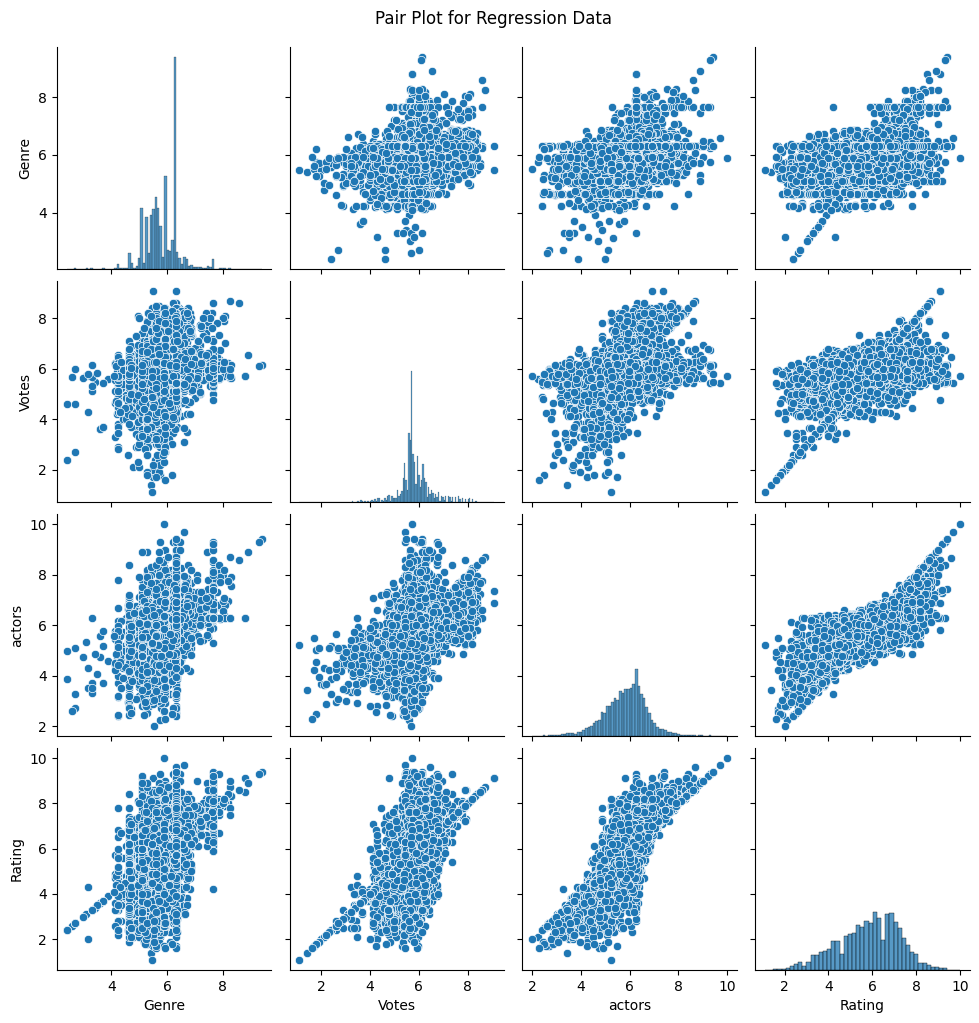

In [73]:
sns.pairplot(df[['Genre', 'Votes', 'actors', 'Rating']])
plt.suptitle('Pair Plot for Regression Data', y=1.02)
plt.show()

# Models

### linear regression

In [74]:

lr = LinearRegression()
lr.fit(X_train,y_train)
train_prediction= lr.predict(X_train)
test_prediction = lr.predict(X_test)

print('MAE:',mean_absolute_error(y_test,test_prediction) )
print('MSE:', mean_squared_error(y_test,test_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('R2 score: ',r2_score(y_test,test_prediction))

print("The accuracy of train model is {}%".format(round(r2_score(y_train,train_prediction), 5) *100))
print("The accuracy of test model is {}%".format(round(r2_score(y_test,test_prediction), 5) *100))

MAE: 0.4602083574135854
MSE: 0.3845562001130313
RMSE: 0.6201259550389996
R2 score:  0.7931542881153832
The accuracy of train model is 80.143%
The accuracy of test model is 79.315%


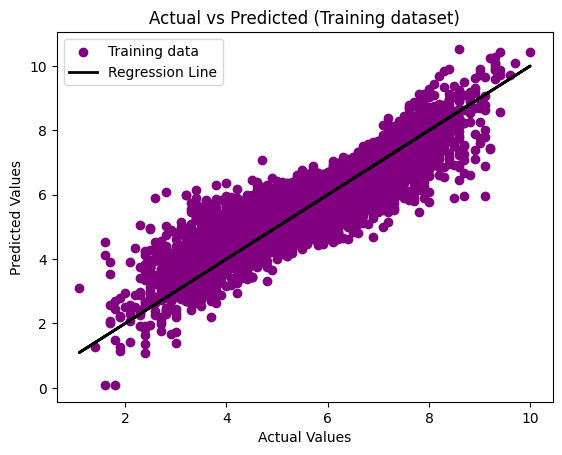

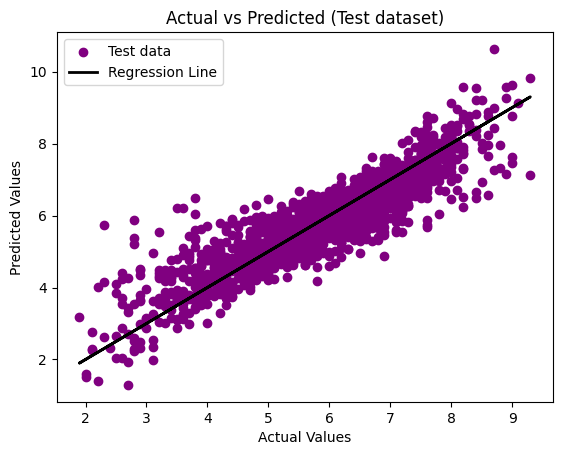

In [75]:
plt.scatter(y_train, train_prediction, color='purple', label='Training data')

plt.plot(y_train, y_train, color='black', linewidth=2, label='Regression Line')

plt.title('Actual vs Predicted (Training dataset)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


plt.scatter(y_test, test_prediction, color='purple', label='Test data')

plt.plot(y_test, y_test, color='black', linewidth=2, label='Regression Line')

plt.title('Actual vs Predicted (Test dataset)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

###  Ridge regression

In [76]:
ridgeReg = Ridge(alpha=100)
ridgeReg.fit(X_train,y_train)
test_predict= ridgeReg.predict(X_test)
train_predict= ridgeReg.predict(X_train)
mae_ridge = metrics.mean_absolute_error(y_test, test_predict)
mse_ridge =  metrics.mean_squared_error(y_test, test_predict)
rmse_ridge =  np.sqrt(mse_ridge)
print('MAE:', mae_ridge)
print('MSE:', mse_ridge)
print('RMSE:', rmse_ridge)
score5 = r2_score(y_train,train_predict)
print("The accuracy of train model is {}%".format(round(score5, 5) *100))
score55 = r2_score(y_test,test_predict)
print("The accuracy of test model is {}%".format(round(score55, 5) *100))

MAE: 0.45961165505661306
MSE: 0.3842182173764268
RMSE: 0.6198533837742816
The accuracy of train model is 80.137%
The accuracy of test model is 79.334%


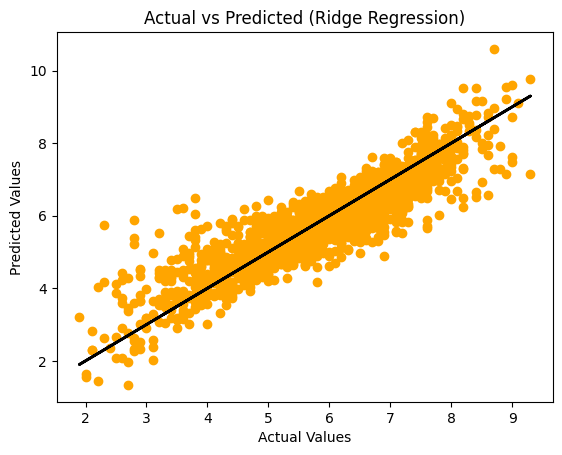

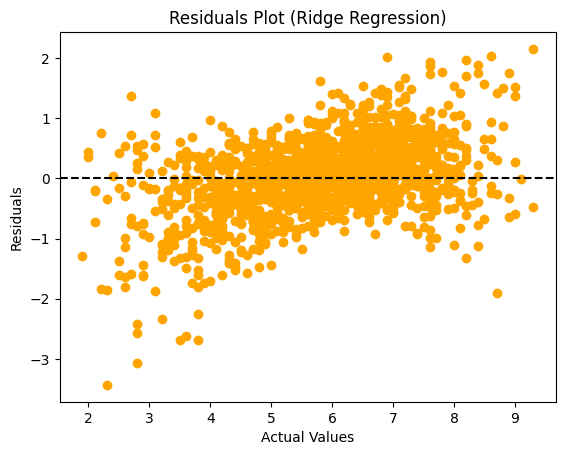

In [77]:
plt.scatter(y_test, test_predict, color='orange')
plt.plot(y_test, y_test, color='black', linewidth=2)
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


residuals_ridge = y_test - test_predict

plt.scatter(y_test, residuals_ridge, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

###  polynominal regression

In [78]:
poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predicted = poly_model.predict(X_test_poly)
mae_poly = metrics.mean_absolute_error(y_test, y_test_predicted)
mse_poly =  metrics.mean_squared_error(y_test, y_test_predicted)
rmse_poly =  np.sqrt(mse_poly)
print('MAE:', mae_poly)
print('MSE:', mse_poly)
print('RMSE:', rmse_poly)
score6 = r2_score(y_train,y_train_predicted)
print("The accuracy of train model is {}%".format(round(score6, 5) *100))
score66 = r2_score(y_test,y_test_predicted)
print("The accuracy of test model is {}%".format(round(score66, 5) *100))

MAE: 0.41197597162457084
MSE: 0.3315965841037199
RMSE: 0.5758442359733402
The accuracy of train model is 83.517%
The accuracy of test model is 82.164%


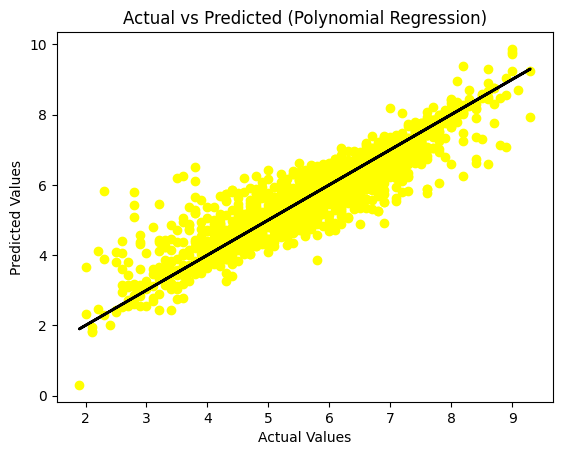

In [79]:
plt.scatter(y_test, y_test_predicted, color='yellow')
plt.plot(y_test, y_test, color='black', linewidth=2)
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

###  SVR

In [80]:
svr = SVR()
svr.fit(X_train, y_train)
svr_prediction = svr.predict(X_test)
svr_prediction_train = svr.predict(X_train)
mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)
mse_svr =  metrics.mean_squared_error(y_test, svr_prediction)
rmse_svr =  np.sqrt(mse_svr)
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)
score3 = r2_score(y_train,svr_prediction_train)
print("The accuracy of train model is {}%".format(round(score3, 5) *100))
score33 = r2_score(y_test,svr_prediction)
print("The accuracy of test model is {}%".format(round(score33, 5) *100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MAE: 0.3868742866105015
MSE: 0.32196552704426157
RMSE: 0.5674200622504121
The accuracy of train model is 83.711%
The accuracy of test model is 82.682%


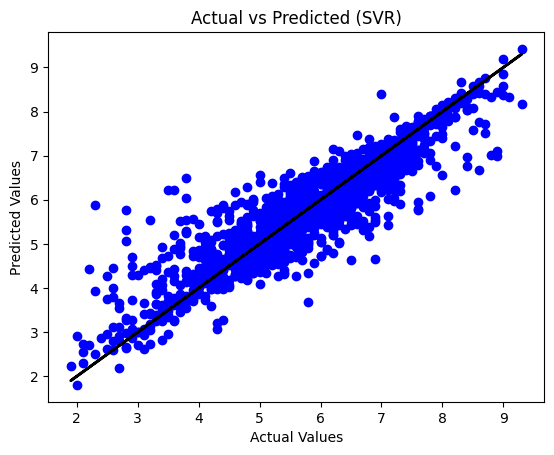

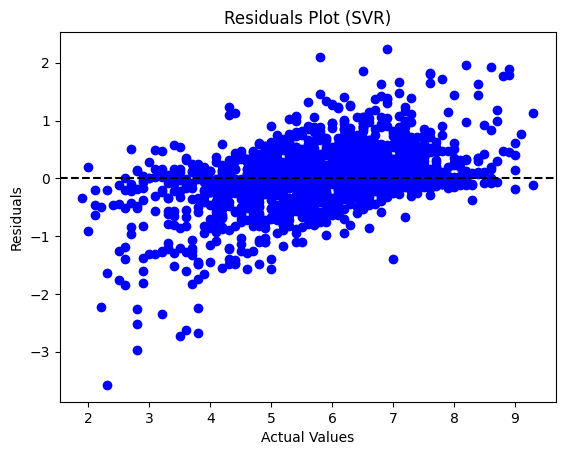

In [81]:
plt.scatter(y_test, svr_prediction, color='blue')
plt.plot(y_test, y_test, color='black', linewidth=2)
plt.title('Actual vs Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

residuals_svr = y_test - svr_prediction.reshape(-1,1)


plt.scatter(y_test, residuals_svr, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

###  Gradient Boosting regression

In [82]:
GB_reg = GradientBoostingRegressor(max_depth=2, n_estimators=44, learning_rate=.5,random_state=42,init="zero")
GB_reg.fit(X_train, y_train)

test_predict_gb= GB_reg.predict(X_test)
train_predict= GB_reg.predict(X_train)

mae_GB = metrics.mean_absolute_error(y_test, test_predict_gb)
mse_GB =  metrics.mean_squared_error(y_test, test_predict_gb)
rmse_GB =  np.sqrt(mse_poly)

print('MAE:', mae_GB)
print('MSE:', mse_GB)
print('RMSE:', rmse_GB)

score7 = r2_score(y_train,train_predict)
print("The accuracy of train model is {}%".format(round(score7, 5) *100))
score77 = r2_score(y_test,test_predict_gb)
print("The accuracy of test model is {}%".format(round(score77, 5) *100))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MAE: 0.42369101639814827
MSE: 0.34392108426082757
RMSE: 0.5758442359733402
The accuracy of train model is 83.69%
The accuracy of test model is 81.501%


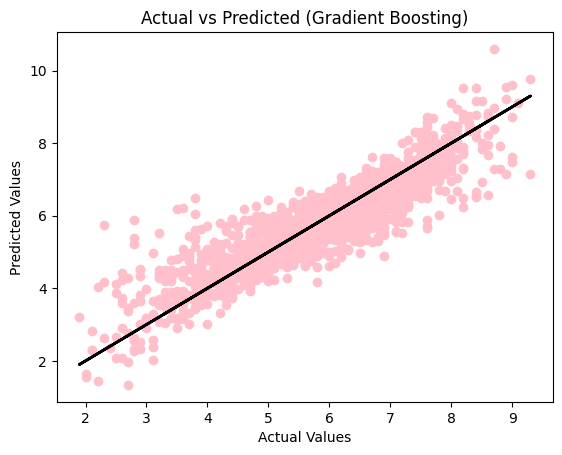

In [83]:
plt.scatter(y_test, test_predict, color='pink')
plt.plot(y_test, y_test, color='black', linewidth=2)
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()